### Name: Sohan Rudra
### Roll No: 16MA20054

In [1]:
#library imports
import math
from collections import namedtuple
from fractions import Fraction 
from copy import copy
import numpy as np
from numpy.linalg import inv
from sympy import *
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
#some boilerplate code
x = symbols('x')
Equation = namedtuple('Equation',('alpha'))
Conditions = namedtuple('Conditions',('r','dx','x0','xn','u0','un','uf'))

In [4]:
%%latex
\begin{align}
\frac{\partial u}{\partial t} = \frac{\partial^2 u}{\partial t^2}\\
u(x,0) = sin(x)\\
u(0,t) = 0\\
u(1,t)\\
\delta x = 0.25, r = 0.25\\
\end{align}

<IPython.core.display.Latex object>

In [5]:
def initilize(cond):
    n = int(np.ceil((cond.xn - cond.x0)/cond.dx))
    x_s = np.arange(cond.x0, cond.xn + cond.dx, cond.dx)
    y = np.asarray([cond.uf.subs(x, xi) for xi in x_s])
    return y

In [6]:
def Finite_Diff_Solver(cond, sols, verbose=True):
    n = int(np.ceil((cond.xn - cond.x0)/cond.dx))
    a, b, c, d = np.zeros((n-2)), np.zeros((n-1)), np.zeros((n-2)), np.zeros((n-1))
    #A
    b[0] = -(1 + 2.0*cond.r)
    c[0] = cond.r
    a[n-3] = cond.r
    b[n-2] = -(1 + 2.0*cond.r)
    #d
    d[0] = -sols[1] - cond.r * cond.u0
    d[n-2] = -sols[-2] - cond.r * cond.un 
    for i, xi in enumerate(np.arange(cond.x0 + 2*cond.dx, cond.xn - cond.dx, cond.dx),\
                           start=1):
        a[i-1] = cond.r
        b[i] = -(1 + 2.0*cond.r)
        c[i] = cond.r
        d[i] = -sols[i+1] - cond.r * cond.u0
    
    def tridiag(a, b, c, k1=-1, k2=0, k3=1):
        return np.diag(a, k1) + np.diag(b, k2) + np.diag(c, k3)
    if verbose:
        print("A={}".format(tridiag(a,b,c)))
        print("d={}".format(d.T))
    return (a,b,c,d)

In [7]:
def Thomas_Algorithm(coeff, cond):
    n = int(np.ceil((cond.xn - cond.x0)/cond.dx))
    a, b, c, d = coeff
    c1 = np.zeros((n-2))
    d1 = np.zeros((n-1))
    c1[0] = c[0]/b[0]
    d1[0] = d[0]/b[0]
    for i in range(1,n-2):
        c1[i] = c[i]/(b[i]-a[i-1]*c1[i-1])
        d1[i] = (d[i] - a[i-1] * d1[i-1])/(b[i]-a[i-1]*c1[i-1])
    d1[n-2] = (d[n-2] - a[n-3] * d1[n-3])/(b[n-2] - a[n-3]*c1[n-3])
    def backsubstitution(c,d):
        y = np.zeros_like(d)
        y[-1] = d[-1]
        cache = y[-1]
        for i in reversed(range(d.shape[0]-1)):
            y[i] = d[i] - cache * c[i]
            cache = y[i]
        return y
    fin_y = backsubstitution(c1,d1)
    y = np.append(fin_y, cond.un)
    y = np.append(cond.u0, y)
    return y

In [8]:
def PDE_Solver(eqn, cond, k):
    r = cond.r * cond.dx**2 / eqn.alpha
    Y_sols = []
    y_init = initilize(cond)
    Y_sols.append(y_init)
    y_i = y_init
    for i in range(k):
        coeff = Finite_Diff_Solver(cond, y_i, verbose=False)
        y_i1 = Thomas_Algorithm(coeff, cond)
        Y_sols.append(y_i1)
        y_i = copy(y_i1)
    return Y_sols

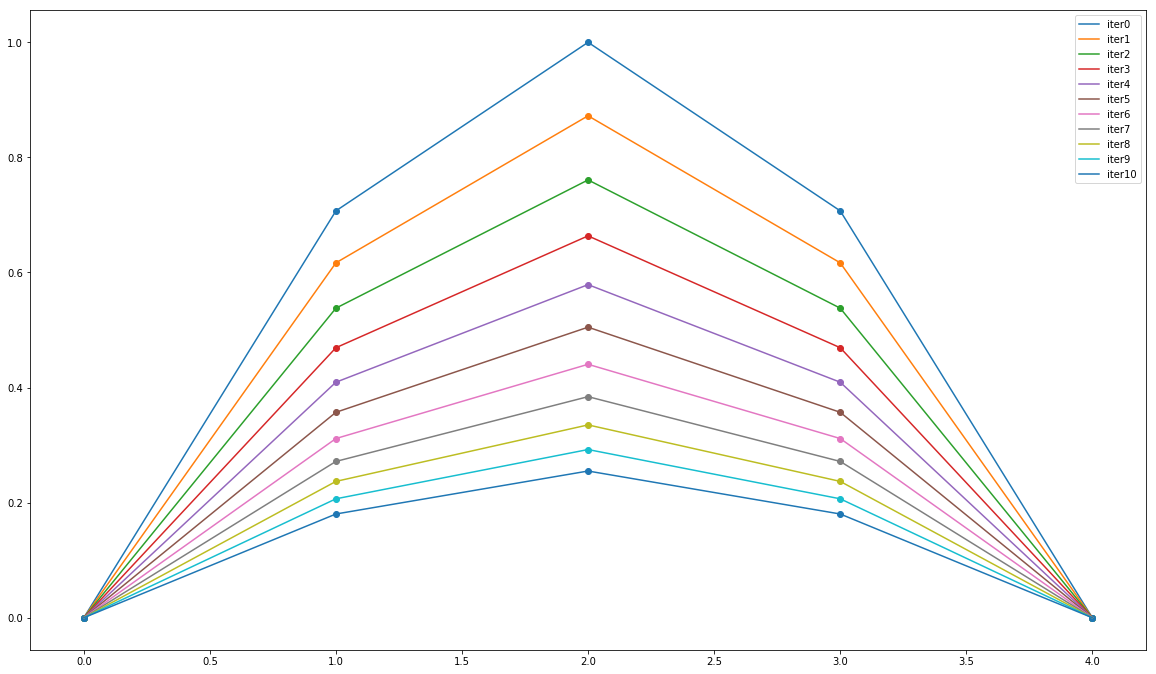

In [9]:
eqn = Equation(1)
cond = Conditions(0.25,0.25,0.0,1.0,0.0,0.0,sin(np.pi*x))
y = PDE_Solver(eqn, cond, 10)
n = int(np.ceil((cond.xn - cond.x0)/cond.dx))
x_range = np.arange(0, n + 1)
fig = plt.figure(figsize=(20, 40))
ax = fig.add_subplot(311)
g = []
for i in range(len(y)):
    ax.plot(x_range, y[i])
    ax.scatter(x_range, y[i])
    g.append("iter"+str(i))
ax.legend(tuple(g))
fig.show()

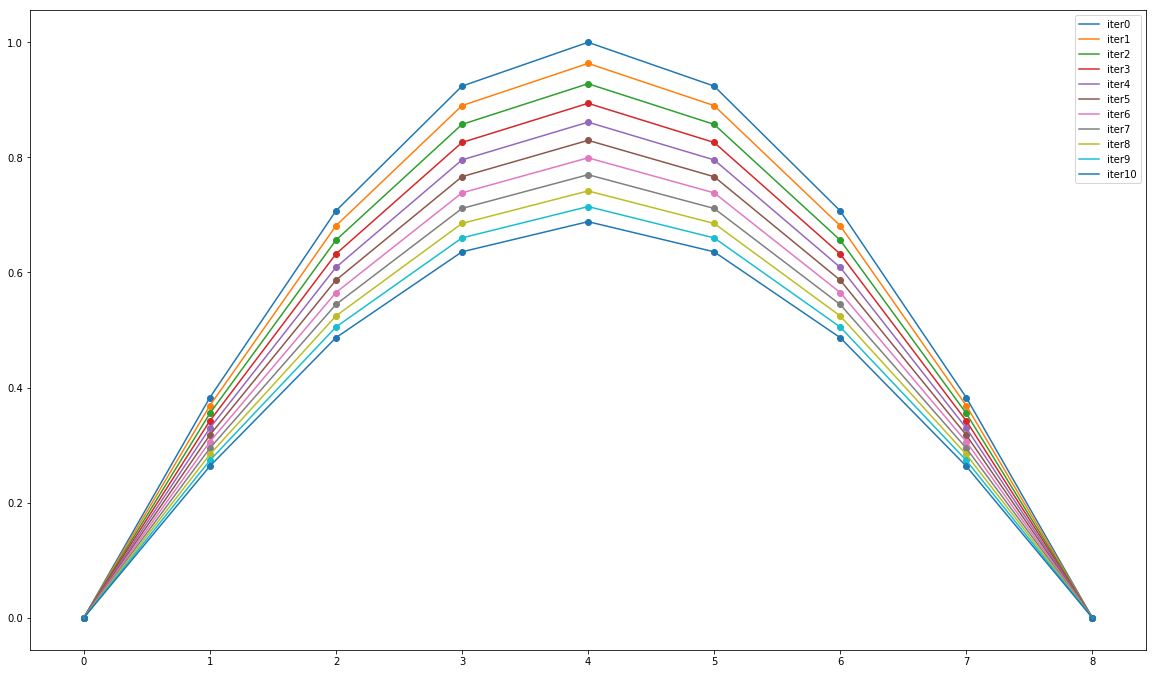

In [10]:
eqn = Equation(1)
cond = Conditions(0.25,0.125,0.0,1.0,0.0,0.0,sin(np.pi*x))
y = PDE_Solver(eqn, cond, 10)
n = int(np.ceil((cond.xn - cond.x0)/cond.dx))
x_range = np.arange(0, n + 1)
fig = plt.figure(figsize=(20, 40))
ax = fig.add_subplot(311)
g = []
for i in range(len(y)):
    ax.plot(x_range, y[i])
    ax.scatter(x_range, y[i])
    g.append("iter"+str(i))
ax.legend(tuple(g))
fig.show()

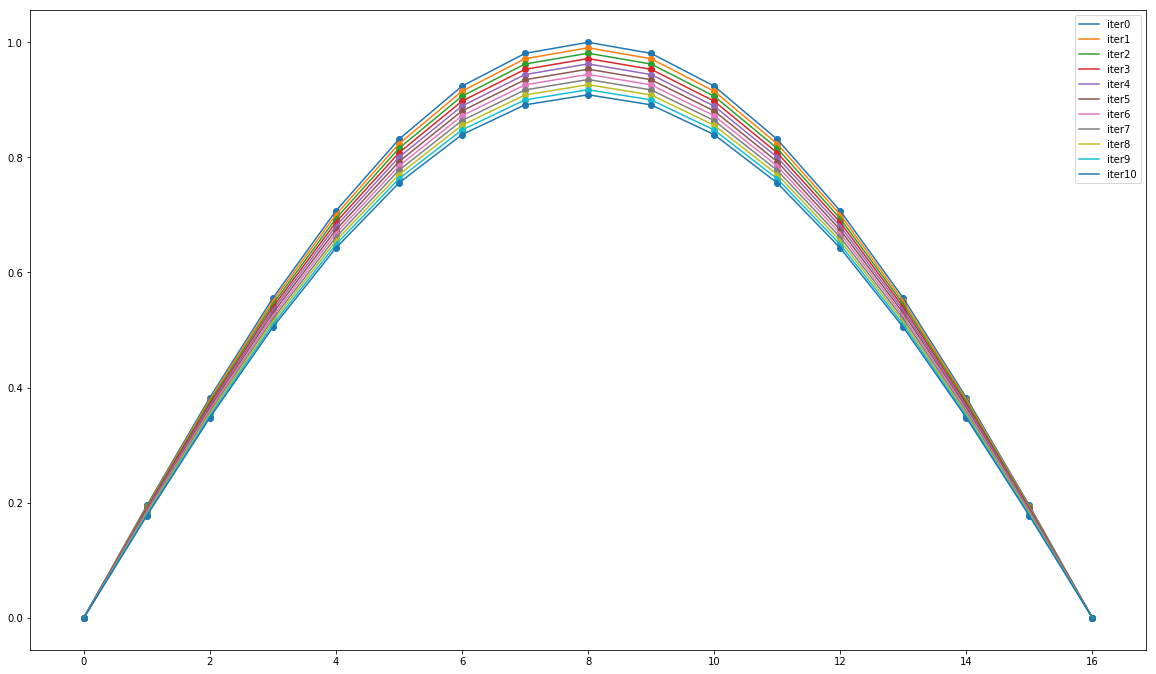

In [11]:
eqn = Equation(1)
cond = Conditions(0.25,0.0625,0.0,1.0,0.0,0.0,sin(np.pi*x))
y = PDE_Solver(eqn, cond, 10)
n = int(np.ceil((cond.xn - cond.x0)/cond.dx))
x_range = np.arange(0, n + 1)
fig = plt.figure(figsize=(20, 40))
ax = fig.add_subplot(311)
g = []
for i in range(len(y)):
    ax.plot(x_range, y[i])
    ax.scatter(x_range, y[i])
    g.append("iter"+str(i))
ax.legend(tuple(g))
fig.show()